In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Feature Engineering - 3PT% and 2PT%

In [2]:
dRegSeasonResults = pd.read_csv("../Data/MRegularSeasonDetailedResults.csv")
dTourneyResults = pd.read_csv("../Data/MNCAATourneyDetailedResults.csv")

In [25]:
dRegSeasonResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92827,2020,128,1389,56,1233,54,N,0,15,60,...,16,18,20,4,27,6,17,8,4,20
92828,2020,128,1393,81,1314,53,N,0,28,61,...,16,11,13,13,29,9,18,0,1,18
92829,2020,128,1402,85,1111,68,H,0,34,57,...,15,25,35,8,17,6,18,7,2,18
92830,2020,128,1412,74,1427,69,N,0,26,53,...,27,7,7,12,22,11,13,4,2,18


In [26]:
# gets 3PT Attempt Percentage
def threeFgap(row):
    if "WFGA" in row:
        threeFgap = row["WFGA3"]/float(row["WFGA"])
    else:
        threeFgap = row["LFGA3"]/float(row["LFGA"])
    return threeFgap
# Gets 2PT Attempt percentage by taking the percent of all field goal attempts which aren't 3PTs
def twoFgap(row):
    if "WFGA" in row:
        twoFgap = float(row["WFGA"] - row["WFGA3"])/float(row["WFGA"])
    else:
        twoFgap = float(row["LFGA"] - row["LFGA3"])/float(row["LFGA"])
    return twoFgap

In [27]:
dRegSeasonResults["WFGA%3"] = dRegSeasonResults[["WFGA", "WFGA3"]].apply(threeFgap, axis=1)
dRegSeasonResults["WFGA%2"] = dRegSeasonResults[["WFGA", "WFGA3"]].apply(twoFgap, axis=1)
dRegSeasonResults["LFGA%3"] = dRegSeasonResults[["LFGA", "LFGA3"]].apply(threeFgap, axis=1)
dRegSeasonResults["LFGA%2"] = dRegSeasonResults[["LFGA", "LFGA3"]].apply(twoFgap, axis=1)

In [28]:
# New Regular Season box scores with new features
dRegSeasonResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LDR,LAst,LTO,LStl,LBlk,LPF,WFGA%3,WFGA%2,LFGA%3,LFGA%2
0,2003,10,1104,68,1328,62,N,0,27,58,...,22,8,18,9,2,20,0.241379,0.758621,0.188679,0.811321
1,2003,10,1272,70,1393,63,N,0,26,62,...,25,7,12,8,6,16,0.322581,0.677419,0.358209,0.641791
2,2003,11,1266,73,1437,61,N,0,24,58,...,22,9,12,2,5,23,0.310345,0.689655,0.356164,0.643836
3,2003,11,1296,56,1457,50,N,0,18,38,...,20,9,19,4,3,23,0.236842,0.763158,0.448980,0.551020
4,2003,11,1400,77,1208,71,N,0,30,61,...,15,12,10,7,1,14,0.229508,0.770492,0.258065,0.741935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92827,2020,128,1389,56,1233,54,N,0,15,60,...,27,6,17,8,4,20,0.400000,0.600000,0.347826,0.652174
92828,2020,128,1393,81,1314,53,N,0,28,61,...,29,9,18,0,1,18,0.344262,0.655738,0.266667,0.733333
92829,2020,128,1402,85,1111,68,H,0,34,57,...,17,6,18,7,2,18,0.210526,0.789474,0.326087,0.673913
92830,2020,128,1412,74,1427,69,N,0,26,53,...,22,11,13,4,2,18,0.264151,0.735849,0.402985,0.597015


In [29]:
# Do same for tourney attenders
dTourneyResults["WFGA%3"] = dTourneyResults[["WFGA", "WFGA3"]].apply(threeFgap, axis=1)
dTourneyResults["WFGA%2"] = dTourneyResults[["WFGA", "WFGA3"]].apply(twoFgap, axis=1)
dTourneyResults["LFGA%3"] = dTourneyResults[["LFGA", "LFGA3"]].apply(threeFgap, axis=1)
dTourneyResults["LFGA%2"] = dTourneyResults[["LFGA", "LFGA3"]].apply(twoFgap, axis=1)

In [30]:
# New Tournament box scores with new features
dTourneyResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LDR,LAst,LTO,LStl,LBlk,LPF,WFGA%3,WFGA%2,LFGA%3,LFGA%2
0,2003,134,1421,92,1411,84,N,1,32,69,...,28,16,15,5,0,22,0.420290,0.579710,0.462687,0.537313
1,2003,136,1112,80,1436,51,N,0,31,66,...,26,12,17,10,3,15,0.348485,0.651515,0.250000,0.750000
2,2003,136,1113,84,1272,71,N,0,31,59,...,22,11,12,2,5,18,0.237288,0.762712,0.405797,0.594203
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,20,21,6,6,21,0.132075,0.867925,0.283333,0.716667
4,2003,136,1143,76,1301,74,N,1,27,64,...,26,16,14,5,8,19,0.312500,0.687500,0.375000,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2019,146,1120,77,1246,71,N,1,26,65,...,30,14,14,5,5,19,0.353846,0.646154,0.344262,0.655738
1111,2019,146,1277,68,1181,67,N,0,30,70,...,29,14,17,4,9,9,0.271429,0.728571,0.368421,0.631579
1112,2019,152,1403,61,1277,51,N,0,22,51,...,28,6,11,1,2,15,0.450980,0.549020,0.510638,0.489362
1113,2019,152,1438,63,1120,62,N,0,25,51,...,24,9,5,3,3,12,0.372549,0.627451,0.563636,0.436364


## KenPom Rankings Setup (for model)

In [3]:
kpom = pd.read_csv("../Data/kpom.csv")
teams = pd.read_csv("../Data/MTeams.csv")
teams = teams.set_index("TeamName")
kpom

,Rk,Team,Conf,W-L,AdjEM,AdjO,AdjD,AdjT,Luck,AdjEM.1,OppO,OppD,AdjEM.2,TeamID
0,1,Gonzaga,WCC,26-0,37.92,126.8,88.9,74.8,0.018,7.67,105.8,98.1,5.88,1211.0
1,2,Michigan,B10,20-3,32.46,120.4,88.0,67.1,0.052,16.29,110.9,94.6,2.90,1276.0
2,3,Illinois,B10,21-6,31.36,119.6,88.3,70.6,0.015,17.92,111.7,93.8,9.47,1228.0
3,4,Iowa,B10,21-7,30.75,125.0,94.3,69.9,-0.019,16.11,110.0,93.9,-5.56,1234.0
4,5,Baylor,B12,22-2,30.74,124.1,93.3,68.5,0.050,9.40,106.4,97.0,-4.40,1124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,353,South Carolina St,MEAC,17-1,-23.69,87.7,111.4,72.0,-0.109,-4.83,98.2,103.0,1.87,NaN
353,354,Alabama St,SWAC,14-4,-25.30,84.6,109.9,71.1,-0.049,-15.73,90.9,106.6,-99.00,1106.0
354,355,Maryland Eastern Shore,MEAC,0-0,-25.73,84.8,110.5,68.0,0.000,-99.00,0.0,200.0,-99.00,NaN
355,356,Chicago St,WAC,0-9,-28.06,89.0,117.1,67.8,-0.006,8.80,106.8,98.0,8.80,1152.0


In [32]:
# Commented out so there is no need to add teamIDs everytime (only on first run)

# def getTeamID(row):
#     teamName = row["Team"]
#     if teamName in teams.index:
#         return teams.loc[teamName]["TeamID"]
# kpom["TeamID"] = kpom.apply(getTeamID , axis=1)
# kpom.to_csv("../Data/kpom.csv", index=False)

## Feature Setup for Logistic Regression Model
The output of this section are a few datasets:
- xTrain - features training data
- yTrain - label training data
- xTest - features test data
- yTest - label test data
- features - features by team, as utilized in making further predictions

Model features are:
- Seed Differential
- KenPom Ranking
- FG%
- FGM
- Pts
- TS%
- Possesions
- Defensive Rebounds
- Assists
- Offensive Rating
- Defensive Rating
- Net Rating
- Team PIE

as exploratory data analysis showed these variables to have a stronger correlation with point differential, which dictates wins.

There are 4 of each variable in a training example (except for seed differential, only one, and KenPom Ranking, only one per team). Each team has 2 of each variable for historical regular season performance and postseason performance, for both the winning team and losing team. In total then, there are about 47 variables.

In [4]:
# Merging seeds with tourney dataset, code written by jacobrichman27
seeds = pd.read_csv("../Data/MNCAATourneySeeds.csv")
dTourneyResults = dTourneyResults.merge(seeds, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID']).drop('TeamID', axis=1).rename(columns={'Seed': 'WSeed'})
dTourneyResults = dTourneyResults.merge(seeds, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID']).drop('TeamID', axis=1).rename(columns={'Seed': 'LSeed'})
dTourneyResults['WSeed'] = dTourneyResults['WSeed'].str.replace(r'[^0-9]', '').astype('float')
dTourneyResults['LSeed'] = dTourneyResults['LSeed'].str.replace(r'[^0-9]', '').astype('float')
dTourneyResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WSeed,LSeed
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,17,28,16,15,5,0,22,16.0,16.0
1,2003,136,1112,80,1436,51,N,0,31,66,...,7,8,26,12,17,10,3,15,1.0,16.0
2,2003,136,1113,84,1272,71,N,0,31,59,...,21,20,22,11,12,2,5,18,10.0,7.0
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,14,17,20,21,6,6,21,11.0,6.0
4,2003,136,1143,76,1301,74,N,1,27,64,...,20,10,26,16,14,5,8,19,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2019,146,1120,77,1246,71,N,1,26,65,...,21,11,30,14,14,5,5,19,5.0,2.0
1111,2019,146,1277,68,1181,67,N,0,30,70,...,13,13,29,14,17,4,9,9,2.0,1.0
1112,2019,152,1403,61,1277,51,N,0,22,51,...,18,8,28,6,11,1,2,15,3.0,2.0
1113,2019,152,1438,63,1120,62,N,0,25,51,...,14,9,24,9,5,3,3,12,1.0,5.0


In [5]:
# adding all the necessary features to data frame. This data will then be pulled to 
# form training data
def addFeatures(df):
    df["WFG%"] = df.apply(lambda row: row.WFGM/row.WFGA, axis=1)
    df["LFG%"] = df.apply(lambda row: row.LFGM/row.LFGA, axis=1)
    df["WPts"] = df.apply(lambda row: 2*row.WFGM + row.WFGM3 + row.WFTM, axis=1)
    df["LPts"] = df.apply(lambda row: 2*row.LFGM + row.LFGM3 + row.LFTM, axis=1)
    df["WTS%"] = df.apply(lambda row: row.WPts/(2*(row.WFGA + 0.44 * row.WFTA)), axis=1)
    df["LTS%"] = df.apply(lambda row: row.LPts/(2*(row.LFGA + 0.44 * row.LFTA)), axis=1)
    df["WPos"] = df.apply(lambda row: 0.96*(row.WFGA - row.WOR + row.WTO + 0.44*row.WFTA), axis=1)
    df["LPos"] = df.apply(lambda row: 0.96*(row.LFGA - row.LOR + row.LTO + 0.44*row.LFTA), axis=1)
    df["WOffRtg"] = df.apply(lambda row: 100 * (row.WPts/row.WPos), axis=1)
    df["LDefRtg"] = df.WOffRtg
    df["LOffRtg"] = df.apply(lambda row: 100 * (row.LPts/row.LPos), axis=1)
    df["WDefRtg"] = df.LOffRtg
    df["WNetRtg"] = df.apply(lambda row: row.WOffRtg - row.WDefRtg, axis=1)
    df["LNetRtg"] = df.apply(lambda row: row.LOffRtg - row.LDefRtg, axis=1)
    df["WPIE"] = df.apply(lambda row: (row.WPts + row.WFGM+row.WFTM - row.WFGA - row.WFTA + row.WDR + 0.5*row.WOR + row.WAst +row.WStl + 0.5 * row.WBlk - row.WPF - row.WTO)/((row.LPts + row.WPts) + (row.LFGM + row.WFGM) + (row.LFTM+row.WFTM) - (row.LFGA+row.WFGA) - (row.LFTA+row.WFTA) + (row.LDR+row.WDR) + 0.5*(row.LOR+row.WOR) + (row.LAst+row.WAst) +(row.LStl+row.WStl) + 0.5 * (row.LBlk+row.WBlk) - (row.LPF+row.WPF) - (row.LTO+row.WTO)), axis=1)
    df["LPIE"] = df.apply(lambda row: (row.LPts + row.LFGM+row.LFTM - row.LFGA - row.LFTA + row.LDR + 0.5*row.LOR + row.LAst +row.LStl + 0.5 * row.LBlk - row.LPF - row.LTO)/((row.LPts + row.WPts) + (row.LFGM + row.WFGM) + (row.LFTM+row.WFTM) - (row.LFGA+row.WFGA) - (row.LFTA+row.WFTA) + (row.LDR+row.WDR) + 0.5*(row.LOR+row.WOR) + (row.LAst+row.WAst) +(row.LStl+row.WStl) + 0.5 * (row.LBlk+row.WBlk) - (row.LPF+row.WPF) - (row.LTO+row.WTO)), axis=1)


In [6]:
addFeatures(dRegSeasonResults)
addFeatures(dTourneyResults)
dTourneyResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,WPos,LPos,WOffRtg,LDefRtg,LOffRtg,WDefRtg,WNetRtg,LNetRtg,WPIE,LPIE
0,2003,134,1421,92,1411,84,N,1,32,69,...,75.3024,75.4944,122.174061,122.174061,111.266531,111.266531,10.907530,-10.907530,0.594262,0.405738
1,2003,136,1112,80,1436,51,N,0,31,66,...,74.0736,73.0368,108.000691,108.000691,69.827813,69.827813,38.172878,-38.172878,0.769231,0.230769
2,2003,136,1113,84,1272,71,N,0,31,59,...,64.9728,67.4304,129.284870,129.284870,105.293755,105.293755,23.991115,-23.991115,0.683544,0.316456
3,2003,136,1141,79,1166,73,N,0,29,53,...,68.1600,71.5008,115.903756,115.903756,102.096760,102.096760,13.806996,-13.806996,0.585586,0.414414
4,2003,136,1143,76,1301,74,N,1,27,64,...,66.3552,66.0480,114.535108,114.535108,112.039729,112.039729,2.495379,-2.495379,0.491667,0.508333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2019,146,1120,77,1246,71,N,1,26,65,...,69.6576,70.3104,110.540702,110.540702,100.980794,100.980794,9.559908,-9.559908,0.511737,0.488263
1111,2019,146,1277,68,1181,67,N,0,30,70,...,65.8944,64.0512,103.195416,103.195416,104.603817,104.603817,-1.408401,1.408401,0.496000,0.504000
1112,2019,152,1403,61,1277,51,N,0,22,51,...,58.2912,55.6032,104.647014,104.647014,91.721340,91.721340,12.925674,-12.925674,0.605442,0.394558
1113,2019,152,1438,63,1120,62,N,0,25,51,...,56.9088,54.8736,110.703441,110.703441,112.986937,112.986937,-2.283496,2.283496,0.545455,0.454545


In [8]:
# Data Frame of all features for a single team
train = {"TeamID": [], "KPomRk":[], "RFGM":[], "RFG%": [],"RPts": [],"RTS%": [],"RPos": [],"ROffRtg": [], "RDR":[], "RAst":[], "RDefRtg": [],"RPIE": [], "RNetRtg":[], "TFGM":[], "TFG%": [],"TPts": [],"TTS%": [],"TPos": [],"TOffRtg": [], "TDR":[], "TAst":[], "TDefRtg": [],"TPIE": [], "TNetRtg":[]}
test = {"TeamID": [], "KPomRk":[], "RFGM":[], "RFG%": [],"RPts": [],"RTS%": [],"RPos": [],"ROffRtg": [], "RDR":[], "RAst":[], "RDefRtg": [],"RPIE": [], "RNetRtg":[], "TFGM":[], "TFG%": [],"TPts": [],"TTS%": [],"TPos": [],"TOffRtg": [], "TDR":[], "TAst":[], "TDefRtg": [],"TPIE": [], "TNetRtg":[]}
features = {"TeamID": [], "KPomRk":[], "RFGM":[], "RFG%": [],"RPts": [],"RTS%": [],"RPos": [],"ROffRtg": [], "RDR":[], "RAst":[], "RDefRtg": [],"RPIE": [], "RNetRtg":[], "TFGM":[], "TFG%": [],"TPts": [],"TTS%": [],"TPos": [],"TOffRtg": [], "TDR":[], "TAst":[], "TDefRtg": [],"TPIE": [], "TNetRtg":[]}




In [9]:
# Populates dicts in above cell
def populateDict(data, query):
    print('WTeamID == %d & %s' % (-1,query))
    kpomSorted = kpom.set_index("TeamID")
    for team in teams.set_index("TeamID").index:
        wTourneyRes = dTourneyResults.query('WTeamID == %d & %s' % (team,query))
        lTourneyRes = dTourneyResults.query('LTeamID == %d & %s' % (team,query))
        wRegSeasonRes = dRegSeasonResults.query('WTeamID == %d & %s' % (team,query))
        lRegSeasonRes = dRegSeasonResults.query('LTeamID == %d & %s' % (team,query))
        data["TeamID"].append(team)
        data["KPomRk"].append(kpomSorted.loc[team]["Rk"] if team in kpomSorted.index else None)
        data["TFGM"].append((0 if pd.isna(wTourneyRes.WFGM.mean()) else wTourneyRes.WFGM.mean()) + (0 if pd.isna(lTourneyRes.LFGM.mean()) else lTourneyRes.LFGM.mean())/2)
        data["TFG%"].append((0 if pd.isna(wTourneyRes["WFG%"].mean()) else wTourneyRes["WFG%"].mean()) + (0 if pd.isna(lTourneyRes["LFG%"].mean()) else lTourneyRes["LFG%"].mean())/2)
        data["TPts"].append((0 if pd.isna(wTourneyRes.WPts.mean()) else wTourneyRes.WPts.mean()) + (0 if pd.isna(lTourneyRes.LPts.mean()) else lTourneyRes.LPts.mean())/2)
        data["TTS%"].append((0 if pd.isna(wTourneyRes["WTS%"].mean()) else wTourneyRes["WTS%"].mean()) + (0 if pd.isna(lTourneyRes["LTS%"].mean()) else lTourneyRes["LTS%"].mean())/2)
        data["TPos"].append((0 if pd.isna(wTourneyRes.WPos.mean()) else wTourneyRes.WPos.mean()) + (0 if pd.isna(lTourneyRes.LPos.mean()) else lTourneyRes.LPos.mean())/2)
        data["TAst"].append((0 if pd.isna(wTourneyRes.WAst.mean()) else wTourneyRes.WAst.mean()) + (0 if pd.isna(lTourneyRes.LAst.mean()) else lTourneyRes.LAst.mean())/2)
        data["TDR"].append((0 if pd.isna(wTourneyRes.WDR.mean()) else wTourneyRes.WDR.mean()) + (0 if pd.isna(lTourneyRes.LDR.mean()) else lTourneyRes.LDR.mean())/2)
        data["TOffRtg"].append((0 if pd.isna(wTourneyRes.WOffRtg.mean()) else wTourneyRes.WOffRtg.mean()) + (0 if pd.isna(lTourneyRes.LOffRtg.mean()) else lTourneyRes.LOffRtg.mean())/2)
        data["TDefRtg"].append((0 if pd.isna(wTourneyRes.WDefRtg.mean()) else wTourneyRes.WDefRtg.mean()) + (0 if pd.isna(lTourneyRes.LDefRtg.mean()) else lTourneyRes.LDefRtg.mean())/2)
        data["TNetRtg"].append((0 if pd.isna(wTourneyRes.WNetRtg.mean()) else wTourneyRes.WNetRtg.mean()) + (0 if pd.isna(lTourneyRes.LNetRtg.mean()) else lTourneyRes.LNetRtg.mean())/2)
        data["TPIE"].append((0 if pd.isna(wTourneyRes.WPIE.mean()) else wTourneyRes.WPIE.mean()) + (0 if pd.isna(lTourneyRes.LPIE.mean()) else lTourneyRes.LPIE.mean())/2)
        data["RFGM"].append((0 if pd.isna(wRegSeasonRes.WFGM.mean()) else wRegSeasonRes.WFGM.mean()) + (0 if pd.isna(lRegSeasonRes.LFGM.mean()) else lRegSeasonRes.LFGM.mean())/2)
        data["RFG%"].append((0 if pd.isna(wRegSeasonRes["WFG%"].mean()) else wRegSeasonRes["WFG%"].mean()) + (0 if pd.isna(lRegSeasonRes["LFG%"].mean()) else lRegSeasonRes["LFG%"].mean())/2)
        data["RPts"].append((0 if pd.isna(wRegSeasonRes.WPts.mean()) else wRegSeasonRes.WPts.mean()) + (0 if pd.isna(lRegSeasonRes.LPts.mean()) else lRegSeasonRes.LPts.mean())/2)
        data["RTS%"].append((0 if pd.isna(wRegSeasonRes["WTS%"].mean()) else wRegSeasonRes["WTS%"].mean()) + (0 if pd.isna(lRegSeasonRes["LTS%"].mean()) else lRegSeasonRes["LTS%"].mean())/2)
        data["RPos"].append((0 if pd.isna(wRegSeasonRes.WPos.mean()) else wRegSeasonRes.WPos.mean()) + (0 if pd.isna(lRegSeasonRes.LPos.mean()) else lRegSeasonRes.LPos.mean())/2)
        data["RAst"].append((0 if pd.isna(wRegSeasonRes.WAst.mean()) else wRegSeasonRes.WAst.mean()) + (0 if pd.isna(lRegSeasonRes.LAst.mean()) else lRegSeasonRes.LAst.mean())/2)
        data["RDR"].append((0 if pd.isna(wRegSeasonRes.WDR.mean()) else wRegSeasonRes.WDR.mean()) + (0 if pd.isna(lRegSeasonRes.LDR.mean()) else lRegSeasonRes.LDR.mean())/2)
        data["ROffRtg"].append((0 if pd.isna(wRegSeasonRes.WOffRtg.mean()) else wRegSeasonRes.WOffRtg.mean()) + (0 if pd.isna(lRegSeasonRes.LOffRtg.mean()) else lRegSeasonRes.LOffRtg.mean())/2)
        data["RDefRtg"].append((0 if pd.isna(wRegSeasonRes.WDefRtg.mean()) else wRegSeasonRes.WDefRtg.mean()) + (0 if pd.isna(lRegSeasonRes.LDefRtg.mean()) else lRegSeasonRes.LDefRtg.mean())/2)
        data["RNetRtg"].append((0 if pd.isna(wRegSeasonRes.WNetRtg.mean()) else wRegSeasonRes.WNetRtg.mean()) + (0 if pd.isna(lRegSeasonRes.LNetRtg.mean()) else lRegSeasonRes.LNetRtg.mean())/2)
        data["RPIE"].append((0 if pd.isna(wRegSeasonRes.WPIE.mean()) else wRegSeasonRes.WPIE.mean()) + (0 if pd.isna(lRegSeasonRes.LPIE.mean()) else lRegSeasonRes.LPIE.mean())/2)

In [10]:
populateDict(train, "Season < 2015")
populateDict(test, "Season >= 2015 & Season < 2020")
populateDict(features, "Season < 2020")

WTeamID == -1 & Season < 2015
WTeamID == -1 & Season >= 2015 & Season < 2020
WTeamID == -1 & Season < 2020


In [11]:
df = pd.DataFrame(train)
dft = pd.DataFrame(test)

In [12]:
xTrain = {"Team1ID": [], "Team2ID": [], "SeedDiff":[], "KPom1Rk":[],"1RFGM":[], "1RFG%": [],"1RPts": [],"1RTS%": [],"1RPos": [],"1ROffRtg": [], "1RDR":[], "1RAst":[], "1RDefRtg": [],"1RPIE": [], "1RNetRtg":[], "1TFGM":[], "1TFG%": [],"1TPts": [],"1TTS%": [],"1TPos": [],"1TOffRtg": [], "1TDR":[], "1TAst":[], "1TDefRtg": [],"1TPIE": [], "1TNetRtg":[], "KPom2Rk":[], "2RFGM":[], "2RFG%": [],"2RPts": [],"2RTS%": [],"2RPos": [],"2ROffRtg": [], "2RDR":[], "2RAst":[], "2RDefRtg": [],"2RPIE": [], "2RNetRtg":[], "2TFGM":[], "2TFG%": [],"2TPts": [],"2TTS%": [],"2TPos": [],"2TOffRtg": [], "2TDR":[], "2TLst":[], "2TDefRtg": [],"2TPIE": [], "2TNetRtg":[]}
xTest = {"Team1ID": [], "Team2ID": [], "SeedDiff":[], "KPom1Rk":[],"1RFGM":[], "1RFG%": [],"1RPts": [],"1RTS%": [],"1RPos": [],"1ROffRtg": [], "1RDR":[], "1RAst":[], "1RDefRtg": [],"1RPIE": [], "1RNetRtg":[], "1TFGM":[], "1TFG%": [],"1TPts": [],"1TTS%": [],"1TPos": [],"1TOffRtg": [], "1TDR":[], "1TAst":[], "1TDefRtg": [],"1TPIE": [], "1TNetRtg":[], "KPom2Rk":[], "2RFGM":[], "2RFG%": [],"2RPts": [],"2RTS%": [],"2RPos": [],"2ROffRtg": [], "2RDR":[], "2RAst":[], "2RDefRtg": [],"2RPIE": [], "2RNetRtg":[], "2TFGM":[], "2TFG%": [],"2TPts": [],"2TTS%": [],"2TPos": [],"2TOffRtg": [], "2TDR":[], "2TLst":[], "2TDefRtg": [],"2TPIE": [], "2TNetRtg":[]}
yTrain = []
yTest = []

In [13]:
def buildDataSet(data, label, func):
    dfTrain = df.set_index("TeamID")
    dfTest = dft.set_index("TeamID")
    for index, row in dTourneyResults.iterrows():
        if row.WTeamID in dfTrain.index and row.LTeamID in dfTrain.index and func(row.Season):
            flipIdx = np.random.randint(2) # randomize order of teams
            label.append(flipIdx)
            if(flipIdx):
                data["Team1ID"].append(row.WTeamID)
                data["Team2ID"].append(row.LTeamID)
            else:
                data["Team1ID"].append(row.LTeamID)
                data["Team2ID"].append(row.WTeamID)
            data['SeedDiff'].append(row.WSeed - row.LSeed)
            team1 = dfTrain.loc[row.WTeamID].to_list() 
            team2 = dfTrain.loc[row.LTeamID].to_list()
            keys = [*xTrain][3:]
            i = 0
            if flipIdx:
                for val in team1:
                    data[keys[i]].append(val)
                    i+=1
                for val in team2:
                    data[keys[i]].append(val)
                    i+=1
            else:
                for val in team2:
                    data[keys[i]].append(val)
                    i+=1
                for val in team1:
                    data[keys[i]].append(val)
                    i+=1
    for index, row in dRegSeasonResults.iterrows():
        if row.WTeamID in dfTrain.index and row.LTeamID in dfTrain.index and func(row.Season):
            flipIdx = np.random.randint(2) # randomize order of teams
            label.append(flipIdx)
            if(flipIdx):
                data["Team1ID"].append(row.WTeamID)
                data["Team2ID"].append(row.LTeamID)
            else:
                data["Team1ID"].append(row.LTeamID)
                data["Team2ID"].append(row.WTeamID)
            data['SeedDiff'].append(None)
            team1 = dfTrain.loc[row.WTeamID].to_list() 
            team2 = dfTrain.loc[row.LTeamID].to_list()
            keys = [*xTrain][3:]
            i = 0
            if flipIdx:
                for val in team1:
                    data[keys[i]].append(val)
                    i+=1
                for val in team2:
                    data[keys[i]].append(val)
                    i+=1
            else:
                for val in team2:
                    data[keys[i]].append(val)
                    i+=1
                for val in team1:
                    data[keys[i]].append(val)
                    i+=1


In [14]:
buildDataSet(xTrain, yTrain, lambda x: x < 2015)
buildDataSet(xTest, yTest, lambda x: x >= 2015 and x < 2020)

In [24]:
xTrainDf = pd.DataFrame(xTrain)
yTrainDf = np.array(yTrain)
xTestDf = pd.DataFrame(xTest)
yTestDf = np.array(yTest)
featuresDf = pd.DataFrame(features)

In [25]:
# Dropping some examples because the local KenPom rankings database (kpom.csv) are not fully completed for all teams in NCAA (will come back to later if needed)
xTrainDf["Label"] = yTrainDf
xTrainDf = xTrainDf.drop("SeedDiff", axis=1) # Dropping Seed Differential to increase potential training data
xTrainDf = xTrainDf.drop("KPom1Rk", axis=1) # Dropping Seed Differential to increase potential training data
xTrainDf = xTrainDf.drop("KPom2Rk", axis=1) # Dropping Seed Differential to increase potential training data
xTrainDf = xTrainDf.dropna()
xTrainDf

,Team1ID,Team2ID,1RFGM,1RFG%,1RPts,1RTS%,1RPos,1ROffRtg,1RDR,1RAst,...,2TPts,2TTS%,2TPos,2TOffRtg,2TDR,2TLst,2TDefRtg,2TPIE,2TNetRtg,Label
0,1411,1421,35.725516,0.667631,104.189400,0.805567,100.036241,156.482902,37.882176,18.949312,...,116.000000,0.830554,103.833600,166.521162,38.833333,22.166667,171.786313,0.729028,-5.265151,0
1,1436,1112,36.207940,0.672217,103.578018,0.815144,94.295020,165.050736,37.423458,20.328675,...,115.300000,0.888098,95.969619,180.300321,36.958824,22.388235,164.938571,0.872090,15.361750,0
2,1113,1272,36.508427,0.693678,105.744491,0.852779,94.153699,168.416669,36.243464,22.562578,...,109.237500,0.804557,95.352960,171.535597,34.187500,20.262500,159.829117,0.800232,11.706480,1
3,1166,1141,37.249590,0.694009,107.746650,0.862592,93.822102,172.095287,35.949891,22.241455,...,109.000000,0.854680,101.836800,160.444805,29.500000,19.000000,169.921815,0.689482,-9.477010,0
4,1301,1143,38.356573,0.705066,109.665015,0.858808,95.960920,171.485681,35.959786,22.341991,...,101.916667,0.791293,95.276800,160.135382,34.666667,22.083333,160.594076,0.763374,-0.458694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61293,1196,1246,39.848702,0.712044,111.662081,0.863895,95.380481,175.629419,36.209647,22.673044,...,110.370370,0.847941,93.575111,176.391822,35.611111,20.129630,163.615002,0.853536,12.776820,1
61294,1276,1277,36.223900,0.679794,102.515103,0.838517,91.280863,168.626153,34.202084,20.719396,...,105.756410,0.833963,94.486892,167.811763,37.445513,22.182692,161.043390,0.820435,6.768373,0
61295,1386,1433,36.072875,0.679770,104.832393,0.842953,93.556045,168.272246,35.963147,21.477817,...,108.589286,0.823355,94.732114,172.066253,33.339286,21.410714,152.854699,0.853361,19.211554,1
61296,1418,1209,38.219435,0.673703,108.397442,0.814942,99.513957,163.164831,35.343987,18.941196,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [26]:
# Dropping some examples because the local KenPom rankings database (kpom.csv) are not fully completed for all teams in NCAA. (will come back to later if needed)
xTestDf["Label"] = yTestDf
xTestDf = xTestDf.drop("SeedDiff", axis=1) # Dropping Seed Differential to increase potential training data
xTestDf = xTestDf.drop("KPom1Rk", axis=1) # Dropping Seed Differential to increase potential training data
xTestDf = xTestDf.drop("KPom2Rk", axis=1) # Dropping Seed Differential to increase potential training data
xTestDf = xTestDf.dropna()
xTestDf

,Team1ID,Team2ID,1RFGM,1RFG%,1RPts,1RTS%,1RPos,1ROffRtg,1RDR,1RAst,...,2TPts,2TTS%,2TPos,2TOffRtg,2TDR,2TLst,2TDefRtg,2TPIE,2TNetRtg,Label
0,1264,1214,36.203854,0.658813,106.034899,0.809423,97.400628,163.115519,35.001704,18.146231,...,23.50000,0.185979,31.872000,36.859511,11.750000,2.750000,61.408001,0.061225,-24.548490,0
1,1140,1279,39.897170,0.696311,113.916038,0.849145,99.524758,171.568918,38.543396,22.580189,...,94.00000,0.701125,91.833600,153.023936,42.000000,15.000000,138.961674,0.893333,14.062262,0
2,1173,1129,36.154495,0.669432,103.349847,0.818579,93.270777,166.246239,35.876116,20.812266,...,33.00000,0.274310,30.528000,54.468020,9.500000,7.250000,63.847384,0.203423,-9.379365,1
3,1352,1316,37.014277,0.677283,106.539245,0.838508,95.947055,166.778857,33.783030,20.713904,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,1411,1112,35.725516,0.667631,104.189400,0.805567,100.036241,156.482902,37.882176,18.949312,...,115.30000,0.888098,95.969619,180.300321,36.958824,22.388235,164.938571,0.872090,15.361750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,1153,1222,37.046946,0.639616,104.725066,0.781324,94.881518,165.200814,35.904534,20.385726,...,38.50000,0.259854,34.118400,56.421169,10.000000,3.500000,64.380787,0.171315,-7.959618,1
27317,1426,1209,37.536364,0.688226,109.024058,0.838415,100.394871,163.026294,38.368219,19.945159,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
27318,1276,1277,36.223900,0.679794,102.515103,0.838517,91.280863,168.626153,34.202084,20.719396,...,105.75641,0.833963,94.486892,167.811763,37.445513,22.182692,161.043390,0.820435,6.768373,0
27319,1382,1387,38.127800,0.681608,109.460127,0.832197,98.072565,167.639901,36.015091,21.552616,...,97.50000,0.778962,95.020800,153.949509,37.333333,18.333333,144.541650,0.819545,9.407860,0


In [27]:
featuresDf = featuresDf.drop_duplicates()
featuresDf

,TeamID,KPomRk,RFGM,RFG%,RPts,RTS%,RPos,ROffRtg,RDR,RAst,...,TFG%,TPts,TTS%,TPos,TOffRtg,TDR,TAst,TDefRtg,TPIE,TNetRtg
0,1101,95.0,37.037521,0.687191,106.678947,0.849066,97.137787,164.689745,34.402716,20.784211,...,0.160377,22.000000,0.191638,30.91200,35.584886,7.000000,4.500000,65.981131,0.071856,-30.396245
1,1102,329.0,33.732993,0.702777,98.526697,0.878718,87.830084,168.851544,32.458701,21.609095,...,0.237023,30.250000,0.321657,28.23360,53.558282,8.250000,7.500000,61.144386,0.216757,-7.586104
2,1103,98.0,37.339606,0.670167,107.703510,0.830761,96.198790,167.876059,35.034760,20.924864,...,0.179439,27.000000,0.220327,30.86720,43.862971,9.833333,5.000000,64.273432,0.101787,-20.410461
3,1104,8.0,37.068984,0.674509,105.718447,0.820933,95.238882,166.401262,37.494173,18.575994,...,0.713630,109.866667,0.895353,91.01568,180.530587,30.483333,20.533333,179.546199,0.804946,0.984388
4,1105,348.0,35.194960,0.627984,103.327104,0.774206,100.790037,153.975668,37.430552,19.099349,...,0.194915,34.500000,0.257770,34.04160,50.673294,9.500000,8.000000,59.804990,0.199552,-9.131696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,1467,277.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
367,1468,182.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
368,1469,331.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
369,1470,266.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
# save all relevant datasets to file to avoid processing again
featuresDf.to_csv("../Data/features.csv", index=False)
xTrainDf.to_csv("../Data/xTrain.csv", index=False)
# np.savetxt("../Data/yTrain.csv", yTrainDf)
xTrainDf["Label"].to_csv("../Data/yTrain.csv", index=False)
# np.savetxt("../Data/yTest.csv", yTestDf)
xTestDf["Label"].to_csv("../Data/yTest.csv", index=False)
xTestDf.to_csv("../Data/xTest.csv", index=False)

To train model, use xTrain.csv as training data, with labels given by yTrain.csv, and test the model with xTest.csv, whose labels are given by yTest.csv. features.csv will be used to perform future predictions (i.e., given two arbitary teams, predict who will win).

## Model Development

In [1]:
# Some models to choose from
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
xTrainDf = pd.read_csv("../Data/xTrain.csv")
xTestDf = pd.read_csv("../Data/xTest.csv")

In [3]:
xTrainDfNoID = xTrainDf.drop("Team1ID", axis=1).drop("Team2ID", axis=1)
y = xTrainDfNoID["Label"].to_numpy()
xTrainDfNoID = xTrainDfNoID.drop("Label", axis=1)
X = xTrainDfNoID.to_numpy()
xTestDfNoID = xTestDf.drop("Team1ID", axis=1).drop("Team2ID", axis=1)
y_test = xTestDfNoID["Label"].to_numpy()
xTestDfNoID = xTestDfNoID.drop("Label", axis=1)
X_test = xTestDfNoID.to_numpy()

In [5]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X.T).T
X_test = min_max_scaler.fit_transform(X_test.T).T

In [6]:
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X, y) # Control Model - this is baseline which we always want to exceed

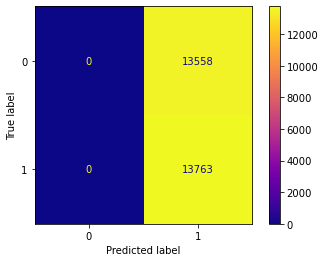

In [7]:
plot_confusion_matrix(dummy_clf, X_test, y_test, cmap="plasma")


In [8]:
svm = SVC() # Nonlinear SVM
parameters = {'kernel':('linear','rbf','poly'),'gamma': [0.3, 0.7], 'C':[0.1,0.3,1]}
svm_clf = GridSearchCV(estimator=svm, param_grid=parameters, scoring='f1_macro') # Grid search for best params
svm_clf.fit(X,y)

In [72]:
    y_pred = svm_clf.predict(X_test)

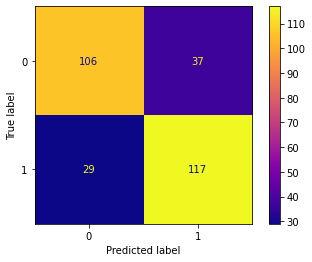

In [73]:
plot_confusion_matrix(svm_clf, X_test, y_test, cmap="plasma")

In [47]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(svm_clf, X, y, train_sizes=[50, 110, 676], cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0), return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

NameError: name 'svm_clf' is not defined

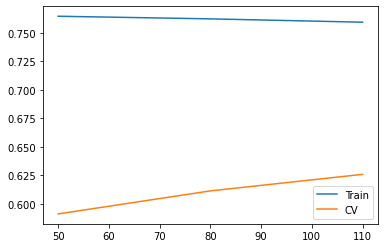

In [94]:
from matplotlib import pyplot as plt
plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, test_scores_mean, label="CV")
plt.legend()
plt.show()

In [8]:
logreg = LogisticRegression(solver="lbfgs", random_state=1337, max_iter=2000) # Nonlinear SVM
logreg.fit(X, y)
logreg.score(X, y)

0.6575418447583934

In [17]:
features = pd.read_csv("../Data/features.csv")
michigan = features.set_index("TeamID").loc[1276][1:].to_list()
txtigers = features.set_index("TeamID").loc[1411][1:].to_list()
mtstmary = features.set_index("TeamID").loc[1291][1:].to_list()

In [18]:
mvt = michigan + txtigers
mvst = mtstmary + michigan
logreg.predict(np.array(mvt).reshape(-1,1).T)

array([1])

In [11]:
logreg.predict(np.array(mvst).reshape(-1,1).T)


array([0])

Text(0, 0.5, 'True Winner')

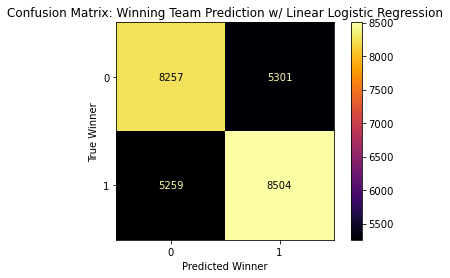

In [46]:
plot_confusion_matrix(logreg, X_test, y_test, cmap="inferno")
plt.title("Confusion Matrix: Winning Team Prediction w/ Linear Logistic Regression")
plt.xlabel("Predicted Winner")
plt.ylabel("True Winner")

In [13]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB() # Nonlinear SVM
nb_clf.fit(X, y)
nb_clf.score(X, y)

0.6306567914124441

In [14]:
svm = SVC(C=1, gamma=1, kernel="linear");
svm.fit(X, y)
svm.score(X,y)

0.8554765245195601

In [16]:
svm.score(X_test, y_test)

0.8262508692946817

In [16]:
plot_confusion_matrix(svm, X_test, y_test, cmap="plasma")
plt.title("Confusion Matrix: Winning Team Prediction w/ Linear Logistic Regression")
plt.xlabel("Predicted Winner")
plt.ylabel("True Winner")

NameError: name 'svm' is not defined

In [17]:
plot_confusion_matrix(logreg_clf, X_test, y_test, cmap="inferno")
plt.title("Confusion Matrix: Winning Team Prediction w/ Linear Logistic Regression")
plt.xlabel("Predicted Winner")
plt.ylabel("True Winner")

NameError: name 'logreg_clf' is not defined

In [9]:
logreg = LogisticRegression(solver="lbfgs", random_state=1337, max_iter=2000) # Nonlinear SVM
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(logreg, X, y, train_sizes=np.linspace(.1,1.0,10), cv = 5, scoring="roc_auc", return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

/home/skunich/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/skunich/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

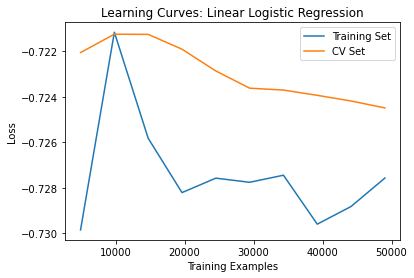

In [10]:
from matplotlib import pyplot as plt
plt.plot(train_sizes, -1*train_scores_mean, label="Training Set")
plt.plot(train_sizes, -1*test_scores_mean, label="CV Set")
plt.legend()
plt.title("Learning Curves: Linear Logistic Regression")
plt.xlabel("Training Examples")
plt.ylabel("Loss")
plt.show()

Text(0, 0.5, 'True Winner')

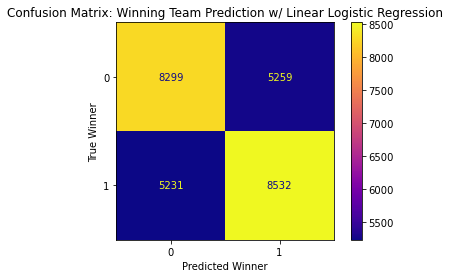

In [11]:
logreg.fit(X, y)
plot_confusion_matrix(logreg, X_test, y_test, cmap="plasma")
plt.title("Confusion Matrix: Winning Team Prediction w/ Linear Logistic Regression")
plt.xlabel("Predicted Winner")
plt.ylabel("True Winner")

In [16]:
for index in xTrainDfNoID.keys():
    xTrainDfNoID["%s^2" % index] = xTrainDfNoID[index]**2
for index in xTestDfNoID.keys():
    xTestDfNoID["%s^2" % index] = xTestDfNoID[index]**2
xTestDfNoID 


,1RFGM,1RFG%,1RPts,1RTS%,1RPos,1ROffRtg,1RDR,1RAst,1RDefRtg,1RPIE,...,2TFG%^2,2TPts^2,2TTS%^2,2TPos^2,2TOffRtg^2,2TDR^2,2TLst^2,2TDefRtg^2,2TPIE^2,2TNetRtg^2
0,36.203854,0.658813,106.034899,0.809423,97.400628,163.115519,35.001704,18.146231,153.694739,0.828097,...,0.026166,552.25000,0.034588,1015.824384,1358.623520,138.062500,7.562500,3770.942544,0.003749,602.628365
1,39.897170,0.696311,113.916038,0.849145,99.524758,171.568918,38.543396,22.580189,154.645141,0.864269,...,0.389451,8836.00000,0.491576,8433.410089,23416.325026,1764.000000,225.000000,19310.346779,0.798044,197.747222
2,36.154495,0.669432,103.349847,0.818579,93.270777,166.246239,35.876116,20.812266,155.512889,0.829038,...,0.059055,1089.00000,0.075246,931.958784,2966.765172,90.250000,52.562500,4076.488485,0.041381,87.972480
3,37.014277,0.677283,106.539245,0.838508,95.947055,166.778857,33.783030,20.713904,158.969818,0.804986,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,35.725516,0.667631,104.189400,0.805567,100.036241,156.482902,37.882176,18.949312,150.043814,0.842095,...,0.541124,13294.09000,0.788718,9210.167737,32508.205889,1365.954637,501.233080,27204.732212,0.760540,235.983374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,37.046946,0.639616,104.725066,0.781324,94.881518,165.200814,35.904534,20.385726,150.736736,0.860659,...,0.043403,1482.25000,0.067524,1164.065219,3183.348270,100.000000,12.250000,4144.885740,0.029349,63.355525
27317,37.536364,0.688226,109.024058,0.838415,100.394871,163.026294,38.368219,19.945159,154.392148,0.839484,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27318,36.223900,0.679794,102.515103,0.838517,91.280863,168.626153,34.202084,20.719396,155.290850,0.839520,...,0.459402,11184.41831,0.695495,8927.772818,28160.787819,1402.166430,492.071838,25934.973372,0.673114,45.810878
27319,38.127800,0.681608,109.460127,0.832197,98.072565,167.639901,36.015091,21.552616,159.569573,0.829726,...,0.429952,9506.25000,0.606782,9028.952433,23700.451432,1393.777778,336.111111,20892.288464,0.671653,88.507826


In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(interaction_only = True), StandardScaler(),SVC(C=1, gamma=1, kernel="poly"))
model.fit(X, y)
model.predict(np.array(mvt).reshape(-1,1).T)

In [29]:
predictions = model.predict_proba(X_test)

In [33]:
predictions[10:20]

array([[0.91194655, 0.08805345],
       [0.45048034, 0.54951966],
       [0.88024273, 0.11975727],
       [0.11070206, 0.88929794],
       [0.42944243, 0.57055757],
       [0.45836644, 0.54163356],
       [0.17109053, 0.82890947],
       [0.48139125, 0.51860875],
       [0.86572035, 0.13427965],
       [0.58017684, 0.41982316]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfmodel = make_pipeline(StandardScaler(),RandomForestClassifier())
